<a href="https://colab.research.google.com/github/YJinil0126/BDS/blob/master/EM_Algorithm_with_the_Gaussian_Mixture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Agenda.
1. Show Scikit-Learn Implementation <br>
2. Gaining intuition into EM Algorithm. <br>
3. The Mathematical Theory Behind the EM algorithm for GMM <br>
4. Implementation. <br>
5. Explaining major parts of EM Algorithm with respect to Numpy. <br>
6. Look at the EM algorithm Again. <br>
7. Experiment with parameters and see how that affects convergence.

EM Algorithm with GMM uses many ideas from probability.<br>
1. Bayes Theorem <br>
2. Law of Total Probability <br>
3. Covariance, Variance <br>
4. Multivariate Normal Distribution <br>
5. Maximum Likelihood Estimation


#### Scikit-Learn Implementation

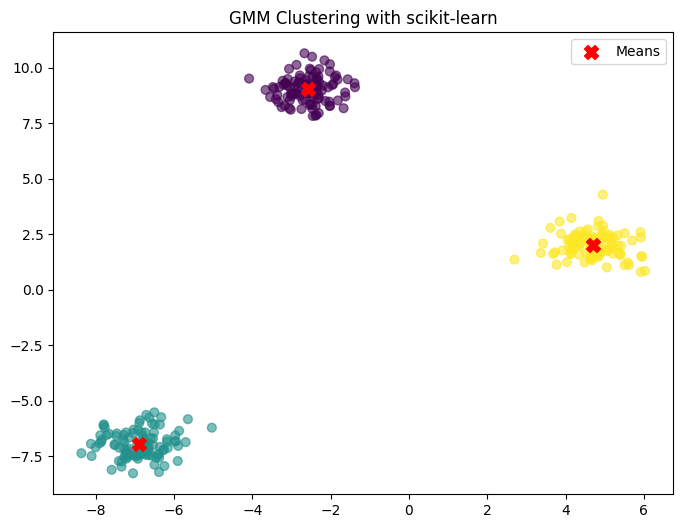

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

# Step 1: Create synthetic 2D data
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)

# Step 2: Fit a GMM
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X)

# Step 3: Predict cluster assignments
labels = gmm.predict(X)

# Optional: Probability of each component
probs = gmm.predict_proba(X)  # shape (300, 3)

# Step 4: Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=40, alpha=0.6)

# Step 5: Plot the GMM means
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', s=100, marker='X', label='Means')
plt.title("GMM Clustering with scikit-learn")
plt.legend()
plt.show()


“The EM algorithm lets you pretend you have complete data, estimate what’s missing, and then optimize as if your guess were true.” <br>--Larry Wasserman, American Statistician

# Expectation-Maximization (EM) Algorithm



## What Are Latent Variables?

Latent variables are **hidden** or **unobserved** factors that influence the data.

### 🔹 Example: Gaussian Mixture Model

You observe 2D data points. They were generated from multiple Gaussian distributions, but:
- You don’t know how many Gaussians there are
- You don’t know which point came from which distribution

Each point has a **latent variable**: its *cluster membership* or component assignment.

### 🔹 Real-Life Analogy

Imagine students take a test:
- You observe scores
- You don’t observe intelligence or motivation

Those unobserved factors are **latent variables**.

The EM algorithm helps estimate both:
1. The latent variables (E-step)
2. The model parameters (M-step)


## 🔍 What Exactly Is Missing in the EM Algorithm for GMM?

In the **Expectation-Maximization (EM) algorithm** for **Gaussian Mixture Models (GMMs)**, the **missing data** are the **latent variables** — specifically, the component assignments for each observed data point.

---

### ✅ Observed vs. Missing

We **observe**:

- The data points:  
  $X = \{x_1, x_2, \dots, x_N\}$

We **do not observe**:

- The component or cluster labels:  
  $Z = \{z_1, z_2, \dots, z_N\}$

Each $z_i$ is a latent variable that indicates which Gaussian component generated $x_i$. It can be represented as a categorical variable:

- $z_i \in \{1, 2, \dots, K\}$  
  or as a one-hot encoded vector over $K$ components.

---

### 💡 Why It’s “Missing Data”

If we knew the values of $z_i$, we could directly use **maximum likelihood estimation** on the **complete-data log-likelihood**:

$$
\log p(X, Z \mid \theta)
$$

But since $z_i$ is **missing**, we instead maximize the **marginal likelihood** of the observed data:

$$
\log p(X \mid \theta) = \sum_{i=1}^{N} \log \left( \sum_{k=1}^{K} \pi_k \, \mathcal{N}(x_i \mid \mu_k, \Sigma_k) \right)
$$

---

### 🔁 How the EM Algorithm Fills in the Missing Data

#### E-Step (Expectation)

Estimate the expected value of the missing latent variables. That is, compute the **responsibility** $r_{ik}$ — the probability that data point $x_i$ was generated by component $k$:

$$
r_{ik} = P(z_i = k \mid x_i, \theta) = \frac{\pi_k \mathcal{N}(x_i \mid \mu_k, \Sigma_k)}{\sum_{j=1}^{K} \pi_j \mathcal{N}(x_i \mid \mu_j, \Sigma_j)}
$$

#### M-Step (Maximization)

Use the responsibilities $r_{ik}$ to update the model parameters $\theta = \{\pi_k, \mu_k, \Sigma_k\}$.

---

### 🧠 Summary Table

| Term         | Observed or Missing? | Description                                |
|--------------|----------------------|--------------------------------------------|
| $x_i$        | Observed             | Data point                                  |
| $z_i$        | Missing (latent)     | Component assignment for $x_i$              |
| $\pi_k$      | To be estimated      | Mixing coefficient for component $k$        |
| $\mu_k$      | To be estimated      | Mean of Gaussian component $k$              |
| $\Sigma_k$   | To be estimated      | Covariance matrix of Gaussian component $k$ |

---

The EM algorithm fills in the **missing labels** $z_i$ probabilistically using the current parameter estimates, then uses those soft assignments to improve the parameter estimates — iterating until convergence.


## Review: Multivariate Gaussian Probability Density Function (PDF)

For a $d$-dimensional data vector $x_i$, the PDF of the multivariate normal distribution with mean vector $\mu_k \in \mathbb{R}^d$ and covariance matrix $\Sigma_k \in \mathbb{R}^{d \times d}$ is:

$$
\mathcal{N}(x_i | \mu_k, \Sigma_k) = \frac{1}{(2 \pi)^{d/2} |\Sigma_k|^{1/2}} \exp \left( -\frac{1}{2} (x_i - \mu_k)^T \Sigma_k^{-1} (x_i - \mu_k) \right)
$$

---

### Definitions of Variables:

- $x_i \in \mathbb{R}^d$: The $i$-th observed data vector with $d$ features.  
- $\mu_k \in \mathbb{R}^d$: Mean vector of the $k$-th Gaussian component.  
- $\Sigma_k \in \mathbb{R}^{d \times d}$: Covariance matrix of the $k$-th Gaussian component.  
- $|\Sigma_k|$: **Determinant** of the covariance matrix $\Sigma_k$, a scalar measuring the volume scaling of the Gaussian.  
- $\Sigma_k^{-1} \in \mathbb{R}^{d \times d}$: **Inverse** of the covariance matrix.  
- $d$: Dimensionality of the data (number of features).  
- $(x_i - \mu_k)^T$: Transpose of the vector $(x_i - \mu_k)$, resulting in a $1 \times d$ row vector.  
- $(x_i - \mu_k)^T \Sigma_k^{-1} (x_i - \mu_k)$: The **Mahalanobis distance squared** between $x_i$ and $\mu_k$, which measures distance accounting for covariance. (Scalar)

---



**Expectation-Maximization (EM) Algorithm for Gaussian Mixture Models (GMM)**

The Expectation-Maximization (EM) algorithm is an iterative method used for finding maximum likelihood estimates of parameters in probabilistic models, particularly when the model involves latent (hidden) variables. In the case of Gaussian Mixture Models (GMM), EM is used to estimate the parameters of multiple Gaussian distributions that describe a given set of data.

A GMM assumes that the data is generated from a mixture of several Gaussian distributions. The model is defined by a set of parameters:

- $k$, the number of Gaussian components.
- $\pi_k$, the mixing coefficient for each component. (Prior Probability)
- $\mu_k$, the mean of each Gaussian component.
- $\Sigma_k$, the covariance of each Gaussian component.

**Goal of the EM Algorithm**

The goal of the EM algorithm is to maximize the likelihood of the observed data by estimating the parameters $\theta = \{ \pi_k, \mu_k, \Sigma_k \}$ that best explain the data.<br>

$$
\theta^* = \arg \max_{\theta} \, \mathcal{L}(\theta)
$$

In the Expectation-Maximization algorithm for GMMs, the goal is to **maximize the log-likelihood** of the observed data under the mixture model. The objective function is:

$$
\mathcal{L}(\theta) = \sum_{i=1}^{N} \log \left( \sum_{k=1}^{K} \pi_k \, \mathcal{N}(x_i \mid \mu_k, \Sigma_k) \right)
$$

Where:

- $N$ is the number of data points.
- $K$ is the number of Gaussian components.
- $\pi_k$ is the mixing coefficient for the $k$-th Gaussian, with $\sum_k \pi_k = 1$.
- $\mathcal{N}(x_i \mid \mu_k, \Sigma_k)$ is the multivariate Gaussian probability density evaluated at $x_i$.
- $\theta = \{\pi_k, \mu_k, \Sigma_k\}_{k=1}^K$ are the parameters we optimize.
---

### **EM Algorithm: Intuition**

The EM algorithm alternates between two steps:

1. **Expectation Step (E-Step)**: Calculate the expected value of the latent variables given the observed data and current estimates of the model parameters.
   
2. **Maximization Step (M-Step)**: Update the parameters of the model by maximizing the expected log-likelihood found in the E-step.

### **Step 1: E-Step**

In the E-step, we estimate the posterior probability that each data point $x_i$ belongs to each Gaussian component $k$. These are the responsibilities, denoted as $r_{ik}$, which are the probabilities that data point $x_i$ is generated by the $k$-th Gaussian component.

The posterior probability (responsibility) for the $k$-th Gaussian component given the data point $x_i$ is computed as:

$$
r_{ik} = \frac{\pi_k \mathcal{N}(x_i | \mu_k, \Sigma_k)}{\sum_{j=1}^{K} \pi_j \mathcal{N}(x_i | \mu_j, \Sigma_j)}
$$

Where:

- $\mathcal{N}(x_i | \mu_k, \Sigma_k)$ is the probability density function (PDF) of the Gaussian distribution with mean $\mu_k$ and covariance $\Sigma_k$ evaluated at $x_i$.
  
  $$
  \mathcal{N}(x_i | \mu_k, \Sigma_k) = \frac{1}{(2 \pi)^{d/2} |\Sigma_k|^{1/2}} \exp \left( -\frac{1}{2} (x_i - \mu_k)^T \Sigma_k^{-1} (x_i - \mu_k) \right)
  $$

- $\pi_k$ is the mixing coefficient for the $k$-th Gaussian component.
- $K$ is the total number of Gaussian components.

### **Step 2: M-Step**

In the M-step, the parameters $\pi_k$, $\mu_k$, and $\Sigma_k$ are updated to maximize the expected log-likelihood. The updates are based on the responsibilities $r_{ik}$ computed in the E-step.

1. **Update the Mixing Coefficients**:

The mixing coefficient $\pi_k$ is updated as the average responsibility for the $k$-th component across all data points:

$$
\pi_k = \frac{1}{N} \sum_{i=1}^{N} r_{ik}
$$

Where $N$ is the total number of data points.

2. **Update the Means**:

The mean $\mu_k$ for the $k$-th component is updated as the weighted average of the data points, weighted by the responsibilities $r_{ik}$:

$$
\mu_k = \frac{\sum_{i=1}^{N} r_{ik} x_i}{\sum_{i=1}^{N} r_{ik}}
$$

3. **Update the Covariances**:

The covariance $\Sigma_k$ for the $k$-th component is updated as the weighted covariance of the data points, again weighted by the responsibilities $r_{ik}$:

$$
\Sigma_k = \frac{\sum_{i=1}^{N} r_{ik} (x_i - \mu_k)(x_i - \mu_k)^T}{\sum_{i=1}^{N} r_{ik}}
$$

### **Convergence**

The EM algorithm iterates between the E-step and M-step until the log-likelihood converges or changes by a small amount. The log-likelihood at each iteration is given by:

$$
\mathcal{L}(\theta) = \sum_{i=1}^{N} \log \left( \sum_{k=1}^{K} \pi_k \mathcal{N}(x_i | \mu_k, \Sigma_k) \right)
$$

This function measures how well the current parameters fit the data, and the algorithm stops when the change in this value becomes sufficiently small.

---

### **Summary of the Algorithm**

The EM algorithm for Gaussian Mixture Models involves the following steps:

1. **Initialize** the parameters $\pi_k$, $\mu_k$, and $\Sigma_k$.
2. **E-Step**: Calculate the responsibilities $r_{ik}$ for each data point $x_i$ based on the current parameters.
3. **M-Step**: Update the parameters $\pi_k$, $\mu_k$, and $\Sigma_k$ using the responsibilities $r_{ik}$.
4. **Repeat** steps until convergence.


**Mixing coefficient** (Prior) is  saying:

“Before I see any data, I believe 30% of the time the data will come from Gaussian #2.”

**Responsibility** (Posterior) is:

“Now that I’ve seen this data point, I think there’s a 70% chance it came from Gaussian #2.”

##### Gaussian Mixture Model Responsibilities, Law of Total Probability, and Bayes Theorem

In a Gaussian Mixture Model with $K$ components, each data point $x_i$ is assumed to be generated from one of the $K$ Gaussian distributions. The probability of observing $x_i$ is given by the law of total probability:

$$
\mathbb{P}(x_i) = \sum_{k=1}^{K} \pi_k \mathcal{N}(x_i | \mu_k, \Sigma_k)
$$

Here:

- $\pi_k$ is the mixing coefficient for component $k$, representing the prior probability that a point comes from component $k$.
- $\mathcal{N}(x_i | \mu_k, \Sigma_k)$ is the likelihood of $x_i$ under the $k$-th Gaussian distribution.

The responsibility $r_{ik}$ represents the posterior probability that data point $x_i$ was generated by component $k$. Using Bayes’ Theorem:

$$
r_{ik} = \mathbb{P}(z_i = k \mid x_i) = \frac{\mathbb{P}(x_i \mid z_i = k) \mathbb{P}(z_i = k)}{\mathbb{P}(x_i)}
$$

Substituting in the Gaussian mixture model terms:

$$
r_{ik} = \frac{\pi_k \mathcal{N}(x_i | \mu_k, \Sigma_k)}{\sum_{j=1}^{K} \pi_j \mathcal{N}(x_i | \mu_j, \Sigma_j)}
$$

In the case where $K = 2$, there are two Gaussians. For each data point $x_i$, we compute two responsibilities:

$$
r_{i1} = \frac{\pi_1 \mathcal{N}(x_i | \mu_1, \Sigma_1)}{\pi_1 \mathcal{N}(x_i | \mu_1, \Sigma_1) + \pi_2 \mathcal{N}(x_i | \mu_2, \Sigma_2)}
$$

$$
r_{i2} = \frac{\pi_2 \mathcal{N}(x_i | \mu_2, \Sigma_2)}{\pi_1 \mathcal{N}(x_i | \mu_1, \Sigma_1) + \pi_2 \mathcal{N}(x_i | \mu_2, \Sigma_2)}
$$

These responsibilities satisfy:

$$
r_{i1} + r_{i2} = 1
$$

This is an application of the **law of total probability**, which ensures the model accounts for all possible components in explaining the data.


## EM Algorithm Implementation in Python

A 2×2 covariance matrix with 1s as variances and 0s as covariances:

$$
\Sigma =
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
$$

This represents two variables that:
- Have unit variance
- Are uncorrelated with each other



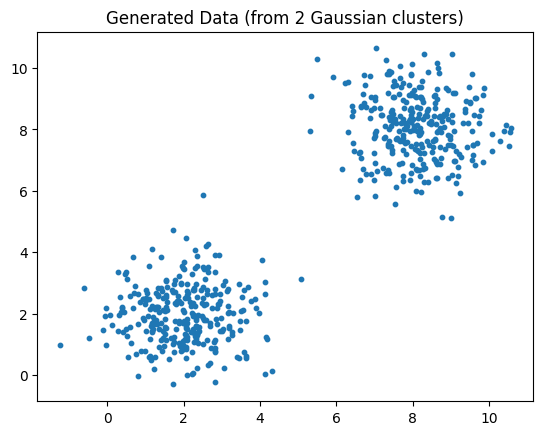

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Generate synthetic 2D data
np.random.seed(42)
n = 300
mu1, mu2 = [2, 2], [8, 8]
sigma1, sigma2 = [[1, 0], [0, 1]], [[1, 0], [0, 1]]

X = np.vstack([
    np.random.multivariate_normal(mu1, sigma1, n),
    np.random.multivariate_normal(mu2, sigma2, n)
])

plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title("Generated Data (from 2 Gaussian clusters)")
plt.show()


In [9]:
sigma1

[[1, 0], [0, 1]]

In [10]:
# EM for 2-component Gaussian Mixture Model

k = 2
n_samples, n_features = X.shape

# Initialize
weights = np.full(k, 1 / k)
means = X[np.random.choice(n_samples, k, replace=False)]
covariances = np.array([np.cov(X, rowvar=False)] * k)

# EM loop
for iteration in range(10):
    # E-step
    responsibilities = np.zeros((n_samples, k))
    for i in range(k):
        responsibilities[:, i] = weights[i] * multivariate_normal.pdf(X, means[i], covariances[i])
    responsibilities /= responsibilities.sum(axis=1, keepdims=True)

    # M-step
    for i in range(k):
        N_k = responsibilities[:, i].sum()
        means[i] = (responsibilities[:, i][:, np.newaxis] * X).sum(axis=0) / N_k
        diff = X - means[i]
        covariances[i] = (responsibilities[:, i][:, np.newaxis, np.newaxis] *
                          np.einsum('ni,nj->nij', diff, diff)).sum(axis=0) / N_k
        weights[i] = N_k / n_samples


In [11]:
means.shape

(2, 2)

In [14]:
covariances

array([[[ 0.95580013,  0.01281185],
        [ 0.01281185,  0.93134669]],

       [[ 0.90598887, -0.087958  ],
        [-0.087958  ,  1.09992881]]])

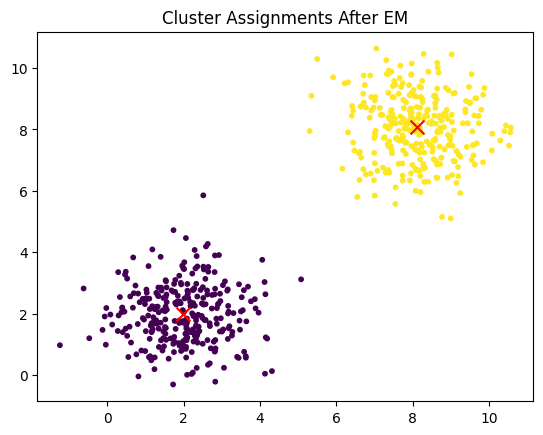

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=responsibilities.argmax(axis=1), cmap='viridis', s=10)
plt.scatter(means[:, 0], means[:, 1], c='red', marker='x', s=100)
plt.title("Cluster Assignments After EM")
plt.show()


## Key NumPy Concepts in EM Algorithm — with Examples

| Concept         | Math Description                                                           | NumPy Operation                                                   | Key Point                                                                 |
| --------------- | -------------------------------------------------------------------------- | ----------------------------------------------------------------- | ------------------------------------------------------------------------- |
| **Broadcasting**  | Multiply $\gamma_{ji}$ (shape $(n,1)$) with $\mathbf{x}_j$ (shape $(n,d)$) | `responsibilities[:, i][:, np.newaxis] * X`                       | Enables weighted sums without explicit loops                              |
| **Normalization** | Normalize $\gamma_{ji}$ to sum to 1 across components for each $j$        | `responsibilities /= responsibilities.sum(axis=1, keepdims=True)` | Keeps probabilities summing to 1 per data point                           |
| **Outer product** | Compute $(\mathbf{x}_j - \boldsymbol{\mu}_i)(\mathbf{x}_j - \boldsymbol{\mu}_i)^\top$ | `np.einsum('ni,nj->nij', diff, diff)`                             | Efficiently calculates all outer products                                 |
| **Summation**     | Sum weighted values over all samples $j$                                  | `.sum(axis=0)`                                                    | `axis=0` sums **down columns** (across rows = samples); `axis=1` sums across columns |


### 🧠 What is `np.newaxis` in NumPy?

`np.newaxis` is a way to **add a new dimension** to an array — it's like reshaping without using `.reshape()`.

---

### 🔢 Why would you need it?

Because many NumPy operations (like broadcasting) require shapes to align. If your array has shape `(n,)` and you want it to behave like `(n, 1)` or `(1, n)`, `np.newaxis` helps you do that **without copying data**.

---

### 📐 Examples

#### 1. Convert a 1D array (vector) to a column vector:

```python
a = np.array([1, 2, 3])       # shape (3,)
a[:, np.newaxis]              # shape (3, 1)


In [15]:
a=np.array([1,2,3])
a.shape

(3,)

In [23]:
temp=a.reshape(-1,1)
temp

array([[1],
       [2],
       [3]])

In [24]:
a=np.array([1,2,3])

a[:,np.newaxis]


array([[1],
       [2],
       [3]])

In [25]:
a=np.array([1,2,3])
a[np.newaxis,:]

array([[1, 2, 3]])

###### Row vector

In [26]:
a.reshape(1,-1)

array([[1, 2, 3]])

##### Column Vector

In [27]:
a.reshape(-1,1)

array([[1],
       [2],
       [3]])

 An array with 3 items, where each item is a 1-row, 1-column matrix.

In [28]:
a[:,np.newaxis,np.newaxis]

array([[[1]],

       [[2]],

       [[3]]])

In [29]:
a[:,np.newaxis,np.newaxis].shape

(3, 1, 1)

### Broadcasting

In [30]:
import numpy as np

# Simulated data
X = np.array([[1.0, 2.0],   # shape (4, 2)
              [3.0, 4.0],
              [5.0, 6.0],
              [7.0, 8.0]])

# Simulated responsibilities for component i (shape (4,))
resp_i = np.array([0.1, 0.2, 0.3, 0.4])  # shape (4,)

# Broadcast to match X
weighted_X = resp_i[:, np.newaxis] * X  # shape (4, 2)
print(weighted_X)



[[0.1 0.2]
 [0.6 0.8]
 [1.5 1.8]
 [2.8 3.2]]


In [32]:
resp_i[:,np.newaxis]

array([[0.1],
       [0.2],
       [0.3],
       [0.4]])

In [ ]:
X.shape

(4, 2)

In [ ]:
weighted_X.shape

(4, 2)

### Normalization

In [33]:
responsibilities = np.array([[0.6, 0.4], [0.2, 0.8]])
responsibilities /= responsibilities.sum(axis=1, keepdims=True)


In [34]:
responsibilities

array([[0.6, 0.4],
       [0.2, 0.8]])

In [35]:
responsibilities.sum(axis=1,keepdims=True)

array([[1.],
       [1.]])

### Outer Product

In [36]:
x = np.array([[2.0, 1.0], [3.0, 4.0]])
mu = np.array([2.5, 2.5])
diff = x - mu  # shape (2, 2)
diff.shape

(2, 2)

In [38]:
temp=np.einsum('ni,nj->nij', diff, diff)
temp.shape

(2, 2, 2)

In [39]:
temp.shape

(2, 2, 2)

### Summation
To get Covariance Estimate

In [40]:
gamma = np.array([0.6, 0.4])[:, np.newaxis, np.newaxis]
weighted_cov = gamma * np.einsum('ni,nj->nij', diff, diff)
covariance = weighted_cov.sum(axis=0)
covariance

array([[0.25, 0.75],
       [0.75, 2.25]])

In [41]:
gamma.shape

(2, 1, 1)

In [43]:
weighted_cov

array([[[0.15, 0.45],
        [0.45, 1.35]],

       [[0.1 , 0.3 ],
        [0.3 , 0.9 ]]])

In [ ]:
covariance.shape

(2, 2)

### Outer Product and Summation

In [44]:
import numpy as np

# 3 samples, 2 features
X = np.array([
    [1.0, 2.0],
    [2.0, 3.0],
    [3.0, 4.0]
])  # shape (3, 2)

# Mean for one component (e.g., GMM component 0)
mean = np.array([2.0, 3.0])  # shape (2,)

# Responsibilities for 3 samples toward this component
r = np.array([0.2, 0.5, 0.3])  # shape (3,)

# Step 1: Compute diff
diff = X - mean  # shape: (3, 2)

# Step 2: Outer products using einsum
outer_products = np.einsum('ni,nj->nij', diff, diff)
# shape: (3, 2, 2)

# Step 3: Reshape responsibilities to broadcast: (3,) → (3, 1, 1)
r_weighted = r[:, np.newaxis, np.newaxis]  # shape: (3, 1, 1)

# Step 4: Apply element-wise multiplication
weighted_outer_products = r_weighted * outer_products  # shape: (3, 2, 2)

# Step 5: Sum across samples
covariance = weighted_outer_products.sum(axis=0) / r.sum()  # shape: (2, 2)

print("Covariance matrix:\n", covariance)


Covariance matrix:
 [[0.5 0.5]
 [0.5 0.5]]


# EM Algorithm with Comments

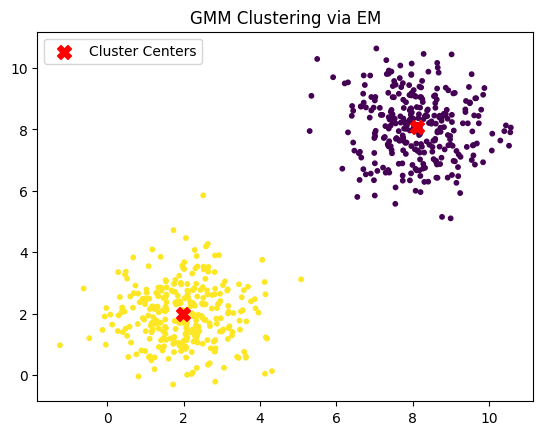

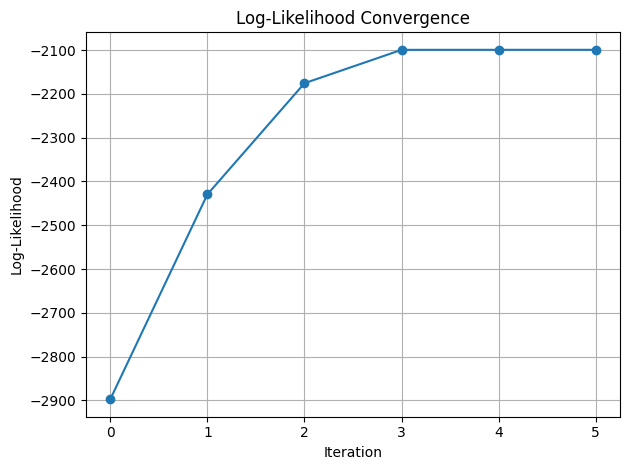

In [45]:
# EM Algorithm for GMM with Comments
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# --- Step 1: Generate Synthetic 2D Data ---
np.random.seed(42)
n = 300
mu1, mu2 = [2, 2], [8, 8]
sigma1, sigma2 = [[1, 0], [0, 1]], [[1, 0], [0, 1]]

# Create two Gaussian clusters and stack them
X = np.vstack([
    np.random.multivariate_normal(mu1, sigma1, n),
    np.random.multivariate_normal(mu2, sigma2, n)
])

# --- Step 2: Initialize Parameters ---
k = 2  # Number of Gaussian components
n_samples, n_features = X.shape
max_iter = 100
tol = 1e-4  # Convergence threshold

np.random.seed(0)

# Mixing coefficients (π) — probability of each component
weights = np.full(k, 1 / k)

# Means (μ) — initialized by randomly picking data points
means = X[np.random.choice(n_samples, k, replace=False)]

# Covariance matrices (Σ) — start with same covariance for each component
covariances = np.array([np.cov(X, rowvar=False) + 1e-6 * np.eye(n_features) for _ in range(k)])

log_likelihoods = []

# --- Step 3: Run EM Iterations ---
for iteration in range(max_iter):
    # --- E-step: Estimate Responsibilities (γ) ---
    responsibilities = np.zeros((n_samples, k))

    for i in range(k):
        # For each component, calculate the weighted PDF
        responsibilities[:, i] = weights[i] * multivariate_normal.pdf(X, mean=means[i], cov=covariances[i])

    # Normalize responsibilities for each sample to sum to 1
    responsibilities_sum = responsibilities.sum(axis=1, keepdims=True)
    responsibilities /= responsibilities_sum

    # --- Log-likelihood (for monitoring convergence) ---
    ll = np.sum(np.log(responsibilities_sum))
    log_likelihoods.append(ll)

    if iteration > 0 and abs(log_likelihoods[-1] - log_likelihoods[-2]) < tol:
        break  # Stop if improvement is very small

    # --- M-step: Update Parameters Using Responsibilities ---
    for i in range(k):
        N_k = responsibilities[:, i].sum()  # Effective number of points assigned to cluster i

        # Update mean (μ_i)
        means[i] = (responsibilities[:, i][:, np.newaxis] * X).sum(axis=0) / N_k

        # Update covariance matrix (Σ_i)
        diff = X - means[i]
        covariances[i] = (responsibilities[:, i][:, np.newaxis, np.newaxis] *
                          np.einsum('ni,nj->nij', diff, diff)).sum(axis=0) / N_k
        covariances[i] += 1e-6 * np.eye(n_features)  # Add small value for numerical stability

        # Update mixing coefficient (π_i)
        weights[i] = N_k / n_samples

# --- Step 4: Plot Final Cluster Assignments ---
colors = responsibilities.argmax(axis=1)  # Assign each point to the component with highest responsibility
plt.scatter(X[:, 0], X[:, 1], c=colors, cmap='viridis', s=10)
plt.scatter(means[:, 0], means[:, 1], c='red', s=100, marker='X', label='Cluster Centers')
plt.title("GMM Clustering via EM")
plt.legend()
plt.show()

# --- Step 5: Plot Log-Likelihood Convergence ---
plt.plot(log_likelihoods, marker='o')
plt.title("Log-Likelihood Convergence")
plt.xlabel("Iteration")
plt.ylabel("Log-Likelihood")
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
np.full(2,1/2)

array([0.5, 0.5])

# Convergence and Covariance between variables.

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from ipywidgets import interact, FloatSlider, fixed
import warnings
warnings.filterwarnings('ignore')

def run_gmm_em(mu1_x=2.0, mu1_y=2.0, mu2_x=6.0, mu2_y=6.0,
               cov1_var_x=1.0, cov1_var_y=1.0, cov1_cov_xy=0.0,
               cov2_var_x=1.0, cov2_var_y=1.0, cov2_cov_xy=0.0):

    np.random.seed(42)
    n = 300
    mu_list = [[mu1_x, mu1_y], [mu2_x, mu2_y]]
    cov_list = [
        [[cov1_var_x, cov1_cov_xy], [cov1_cov_xy, cov1_var_y]],
        [[cov2_var_x, cov2_cov_xy], [cov2_cov_xy, cov2_var_y]]
    ]

    X = np.vstack([
        np.random.multivariate_normal(mean, cov, n)
        for mean, cov in zip(mu_list, cov_list)
    ])

    k = 2
    n_samples, n_features = X.shape
    max_iter = 100
    tol = 1e-4

    np.random.seed(0)
    weights = np.full(k, 1 / k)
    means = X[np.random.choice(n_samples, k, replace=False)]
    covariances = np.array([
        np.cov(X, rowvar=False) + 1e-6 * np.eye(n_features) for _ in range(k)
    ])
    log_likelihoods = []

    for iteration in range(max_iter):
        responsibilities = np.zeros((n_samples, k))
        for i in range(k):
            responsibilities[:, i] = weights[i] * multivariate_normal.pdf(X, mean=means[i], cov=covariances[i])
        responsibilities_sum = responsibilities.sum(axis=1, keepdims=True)
        responsibilities /= responsibilities_sum

        ll = np.sum(np.log(responsibilities_sum))
        log_likelihoods.append(ll)
        if iteration > 0 and abs(log_likelihoods[-1] - log_likelihoods[-2]) < tol:
            break

        for i in range(k):
            N_k = responsibilities[:, i].sum()
            means[i] = (responsibilities[:, i][:, np.newaxis] * X).sum(axis=0) / N_k
            diff = X - means[i]
            covariances[i] = (responsibilities[:, i][:, np.newaxis, np.newaxis] *
                              np.einsum('ni,nj->nij', diff, diff)).sum(axis=0) / N_k
            covariances[i] += 1e-6 * np.eye(n_features)
            weights[i] = N_k / n_samples

    colors = responsibilities.argmax(axis=1)

    plt.figure(figsize=(12, 5))

    # Plot clusters
    plt.subplot(1, 2, 1)
    plt.scatter(X[:, 0], X[:, 1], c=colors, cmap='viridis', s=10)
    plt.scatter(means[:, 0], means[:, 1], c='red', s=100, marker='X', label='Cluster Centers')
    plt.title("GMM Clustering via EM")
    plt.legend()
    plt.grid(True)

    # Plot log-likelihood
    plt.subplot(1, 2, 2)
    plt.plot(log_likelihoods, marker='o')
    plt.title("Log-Likelihood Convergence")
    plt.xlabel("Iteration")
    plt.ylabel("Log-Likelihood")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Interactive widgets for means and covariances
interact(run_gmm_em,
         mu1_x=FloatSlider(min=-5, max=10, step=0.5, value=2),
         mu1_y=FloatSlider(min=-5, max=10, step=0.5, value=2),
         mu2_x=FloatSlider(min=-5, max=10, step=0.5, value=6),
         mu2_y=FloatSlider(min=-5, max=10, step=0.5, value=6),
         cov1_var_x=FloatSlider(min=0.1, max=5, step=0.1, value=1),
         cov1_var_y=FloatSlider(min=0.1, max=5, step=0.1, value=1),
         cov1_cov_xy=FloatSlider(min=-2, max=2, step=0.1, value=0),
         cov2_var_x=FloatSlider(min=0.1, max=5, step=0.1, value=1),
         cov2_var_y=FloatSlider(min=0.1, max=5, step=0.1, value=1),
         cov2_cov_xy=FloatSlider(min=-2, max=2, step=0.1, value=0)
)


interactive(children=(FloatSlider(value=2.0, description='mu1_x', max=10.0, min=-5.0, step=0.5), FloatSlider(v…

<function __main__.run_gmm_em(mu1_x=2.0, mu1_y=2.0, mu2_x=6.0, mu2_y=6.0, cov1_var_x=1.0, cov1_var_y=1.0, cov1_cov_xy=0.0, cov2_var_x=1.0, cov2_var_y=1.0, cov2_cov_xy=0.0)>

In [ ]:
import torch

a = torch.tensor([1.0, 2.0, 3.0])  # shape: (3,)
b = torch.tensor([4.0, 5.0])       # shape: (2,)

outer_product = torch.outer(a, b)
print(outer_product)
# Output:
# tensor([[ 4.,  5.],
#         [ 8., 10.],
#         [12., 15.]])


tensor([[ 4.,  5.],
        [ 8., 10.],
        [12., 15.]])


In [ ]:
a[:,None].shape

torch.Size([3, 1])

In [ ]:
b[None,:]

tensor([[4., 5.]])

In [ ]:
b[None,:].shape

torch.Size([1, 2])

In [ ]:
np.outer(a[:,None],b[None,:])

array([[ 4.,  5.],
       [ 8., 10.],
       [12., 15.]])

In [ ]:
a=np.array([1,2,3])
b=np.array([4,5])

In [ ]:
a[:,None]*b[None,:]

array([[ 4,  5],
       [ 8, 10],
       [12, 15]])